In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')
from utils.data import Subject, load_participant_list
from utils.analysis import compute_parametric_modulator

In [3]:
base_dir = '/Users/hugofluhr/data/LH_dev'
sub_ids = load_participant_list(base_dir)

In [4]:
subjects = [Subject(base_dir, sub_id, include_modeling=True, include_imaging=False) for sub_id in sub_ids]

/Users/hugofluhr/phd_local/repositories/RewardPairsTask_Analysis/notebooks/../utils/data.py:166: UserWarning: Last 1 trial(s) of block had no response, filling with 0


In [5]:
df = subjects[0].extended_trials
df.head()

,block,left_stim,right_stim,left_value,right_value,shift,action,rt,chosen_stim,reward,...,stim1_prop_training,stim2_prop_training,stim_diff_prop_training,stim_diff_prop_training_chosen,reward1C,stim_diff_prop_trainingS,stim_diff_prop_training_chosenS,diff_valS,diff_val_chosenS,score_EHI
0,learning1,5,7,3,4,0,1.0,0.934432,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,learning1,4,6,3,4,1,1.0,0.645392,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,learning1,3,1,2,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,learning1,6,8,4,5,0,1.0,0.368762,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,learning1,2,4,2,3,0,1.0,0.537730,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rl_cols = [col for col in df.columns if col.startswith('stim') and col.endswith('_value_rl')]
ck_cols = [col for col in df.columns if col.startswith('stim') and col.endswith('_value_ck')]

In [20]:
# excluding lowest and highest value stimuli:
rl_cols = rl_cols[1:-1]
ck_cols = ck_cols[1:-1]

In [21]:
RL_values = np.zeros((len(subjects), len(df), len(rl_cols)))
CK_values = np.zeros((len(subjects), len(df), len(ck_cols)))

In [22]:
for i, sub in enumerate(subjects):
    RL_values[i] = sub.extended_trials[rl_cols].values
    CK_values[i] = sub.extended_trials[ck_cols].values

Text(0.5, 1.0, 'CK values')

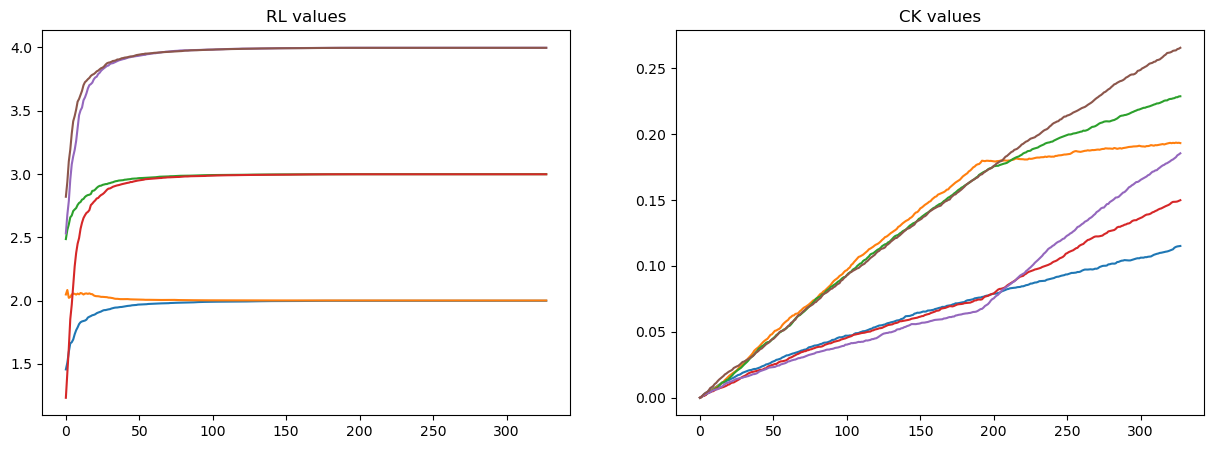

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(RL_values.mean(axis=0))
axs[0].set_title('RL values')
axs[1].plot(CK_values.mean(axis=0))
axs[1].set_title('CK values')

In [25]:
C = np.zeros((RL_values.shape[0],))
for s in range(RL_values.shape[0]):
    C[s] = np.corrcoef(RL_values[s,...].flatten(), CK_values[s,...].flatten())[0,1]

/Users/hugofluhr/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/hugofluhr/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


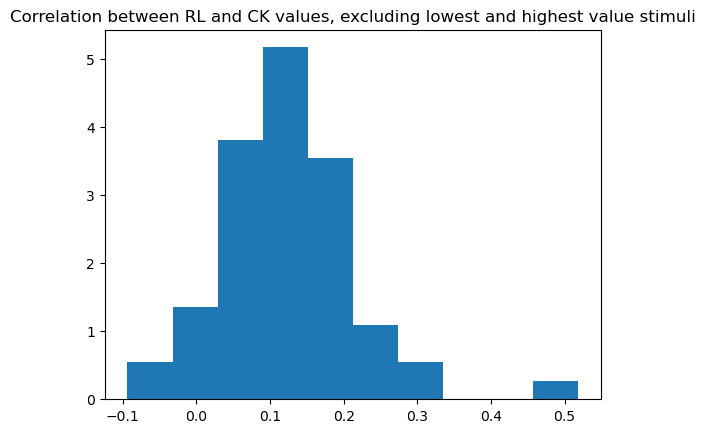

In [30]:
plt.hist(C, density=True)
plt.title('Correlation between RL and CK values, excluding lowest and highest value stimuli')
plt.show()